# Quick Overview

here you can find some quick examples of what you can do with segysak. For more details refere to the [examples](/segysak/build/html/examples.html)

To beging import:
- *Segysak*
- *Numpy*
- *Matplotlib*

And we will also add a variable for the location of the data

In [1]:
import segysak as sg
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
V3D_path = pathlib.Path("../data/volve10r12-full-twt-sub3d.sgy")
print("3D", V3D_path, V3D_path.exists())

3D ../data/volve10r12-full-twt-sub3d.sgy True


## Scan SEGY headers


A basic operation would be to check the text head included in the SEG-Y file. For this you should import *get_segy_texthead*

In [3]:
from segysak.segy import get_segy_texthead
get_segy_texthead(V3D_path)


/home/fabio/.local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

If you need to check deeper the data, then from a SEG-Y file you could also scan the file to check values and basic statistics in each defined byte. It is done by using *segy_heafer_scan* 

The result could also be handle as pandas dataframe through the function '''pd.option_context'''.


In [4]:
from segysak.segy import segy_header_scan

scan = segy_header_scan(V3D_path)
scan

,count,mean,std,min,25%,50%,75%,max,byte_loc
TRACE_SEQUENCE_LINE,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0,1
TRACE_SEQUENCE_FILE,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0,5
FieldRecord,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0,9
TraceNumber,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0,13
EnergySourcePoint,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,17
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,219
SourceEnergyDirectionExponent,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,223
SourceMeasurementMantissa,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,225
SourceMeasurementExponent,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,229


Perhaps they are too many rows to be read in one go. Additionally, some of the bytes are not populate. So a filter can help us to understand the composition of the data.

For instance to locate key values like **coordinates position (73 - X, 77 - Y)** or the **position of ILN (189) and XLN (193)**

In [5]:
scan[scan['std'] > 0]

,count,mean,std,min,25%,50%,75%,max,byte_loc
TRACE_SEQUENCE_LINE,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0,1
TRACE_SEQUENCE_FILE,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0,5
FieldRecord,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0,9
TraceNumber,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0,13
CDP,1000.0,2.249540e+03,57.831072,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0,21
SourceX,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0,73
SourceY,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0,77
CDP_X,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0,181
CDP_Y,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0,185
INLINE_3D,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0,189


If instead of statistics you want the actual text header, then you would like to use *segy_header_scrape*

In [6]:
from segysak.segy import segy_header_scrape
scrape = segy_header_scrape(V3D_path, partial_scan=10000)
scrape

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,10090,10090,1,0,2150,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10090,10090,2,0,2151,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10090,10090,3,0,2152,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10090,10090,4,0,2153,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10090,10090,5,0,2154,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,98,10139,10139,98,0,2247,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,99,10139,10139,99,0,2248,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,100,10139,10139,100,0,2249,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,101,10139,10139,101,0,2250,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load SEG-Y data 

to load SEG-y data you will need to **import**:
- *segy_loader* 

In [7]:
from segysak.segy import segy_loader, well_known_byte_locs
V3D = segy_loader(V3D_path, iline = 189,  xline = 193, cdpx = 73, cdpy = 77, vert_domain='TWT')
V3D


Fast direction is CROSSLINE_3D


<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int64 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int64 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) int64 4 8 12 16 20 24 28 ... 3380 3384 3388 3392 3396 3400
    cdp_x    (iline, xline) float64 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float64 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float64 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes:
    ns:                None
    ds:                None
    text:              C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2...
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       volve10r12-full-twt-sub3d.sgy
    srd:               None
    datatype:          None
    percentiles:       [-6.971982623347994, -6.520540334073793, -1.4914261935...

## To visualize an ILN or XLN 

/home/fabio/anaconda3/envs/T2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'XLINE')

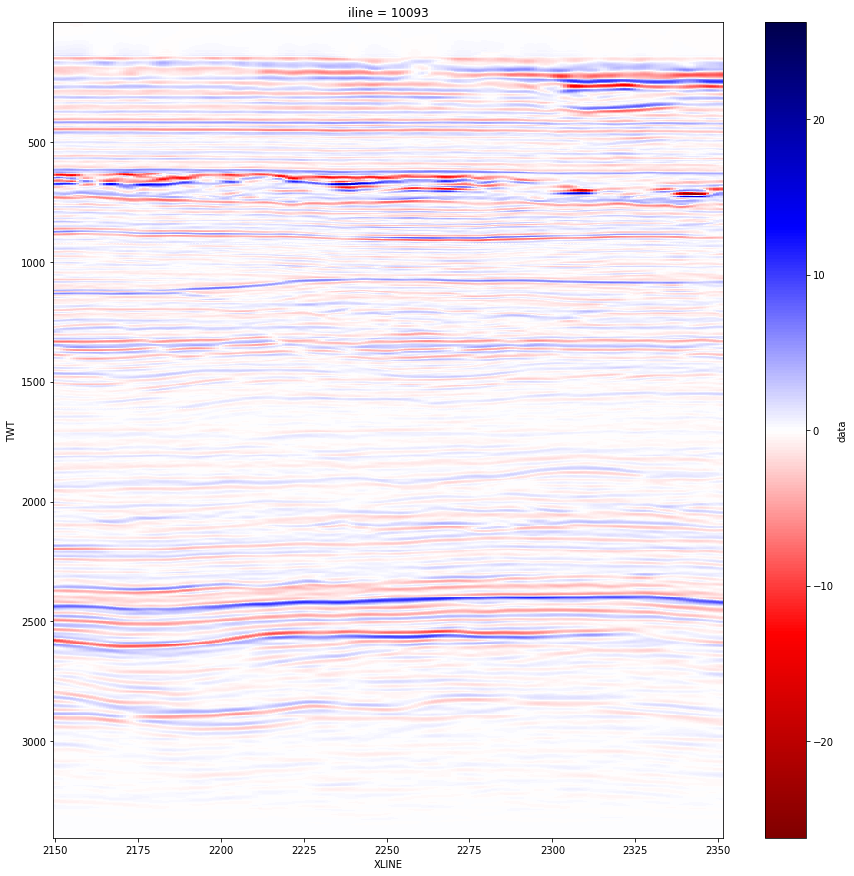

In [8]:
fig, ax1 = plt.subplots(ncols=1, figsize = (15,15))
iline_sel = 10093
V3D.data.transpose('twt', 'iline', 'xline').sel(iline = iline_sel).plot(yincrease=False, cmap = 'seismic_r')
plt.ylabel('TWT')
plt.xlabel('XLINE')